<a href="https://colab.research.google.com/github/A66Youssef/UAE-Real_State/blob/main/UAE_RealState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

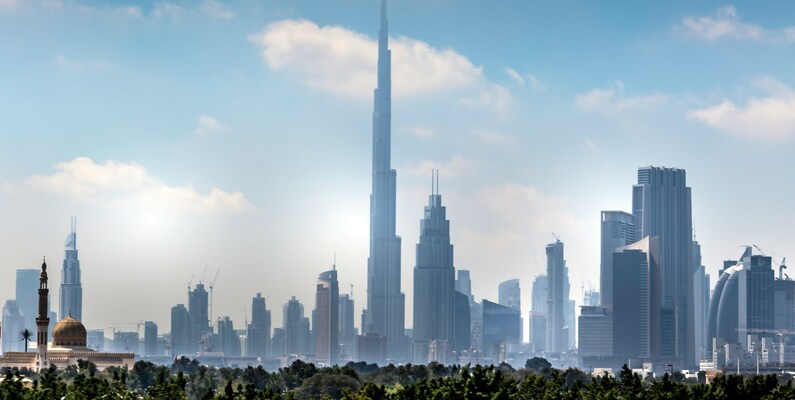

This dataset provides a detailed snapshot of rental property listings across major cities in the United Arab Emirates, including Abu Dhabi, Dubai, Sharjah, Ajman, Ras Al Khaimah, Umm Al Quwain, and Al Ain. Gathered from [bayut.com](https://www.bayut.com/), it includes various attributes such as property type, size, rent, and location details, making it a valuable resource for data-driven insights into the UAE rental market. Ideal for data analysts, researchers, and real estate professionals, this dataset allows for comprehensive analysis of trends, pricing, and market dynamics in the UAE's diverse rental landscape.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [2]:
data=pd.read_csv('/content/drive/MyDrive/dubai_properties.csv')
data.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


# **Data Preprocessing**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

,0
Address,0
Rent,0
Beds,0
Baths,0
Type,0
Area_in_sqft,0
Rent_per_sqft,0
Rent_category,0
Frequency,0
Furnishing,0


In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

,0
Address,0
Rent,0
Beds,0
Baths,0
Type,0
Area_in_sqft,0
Rent_per_sqft,0
Rent_category,0
Frequency,0
Furnishing,0


In [8]:
data.shape

(73023, 17)

In [9]:
data['Posted_date'] = data['Posted_date'].astype('datetime64[ns]')

In [10]:
# Visualize outliers using a box plot
numerical_columns = ['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft']

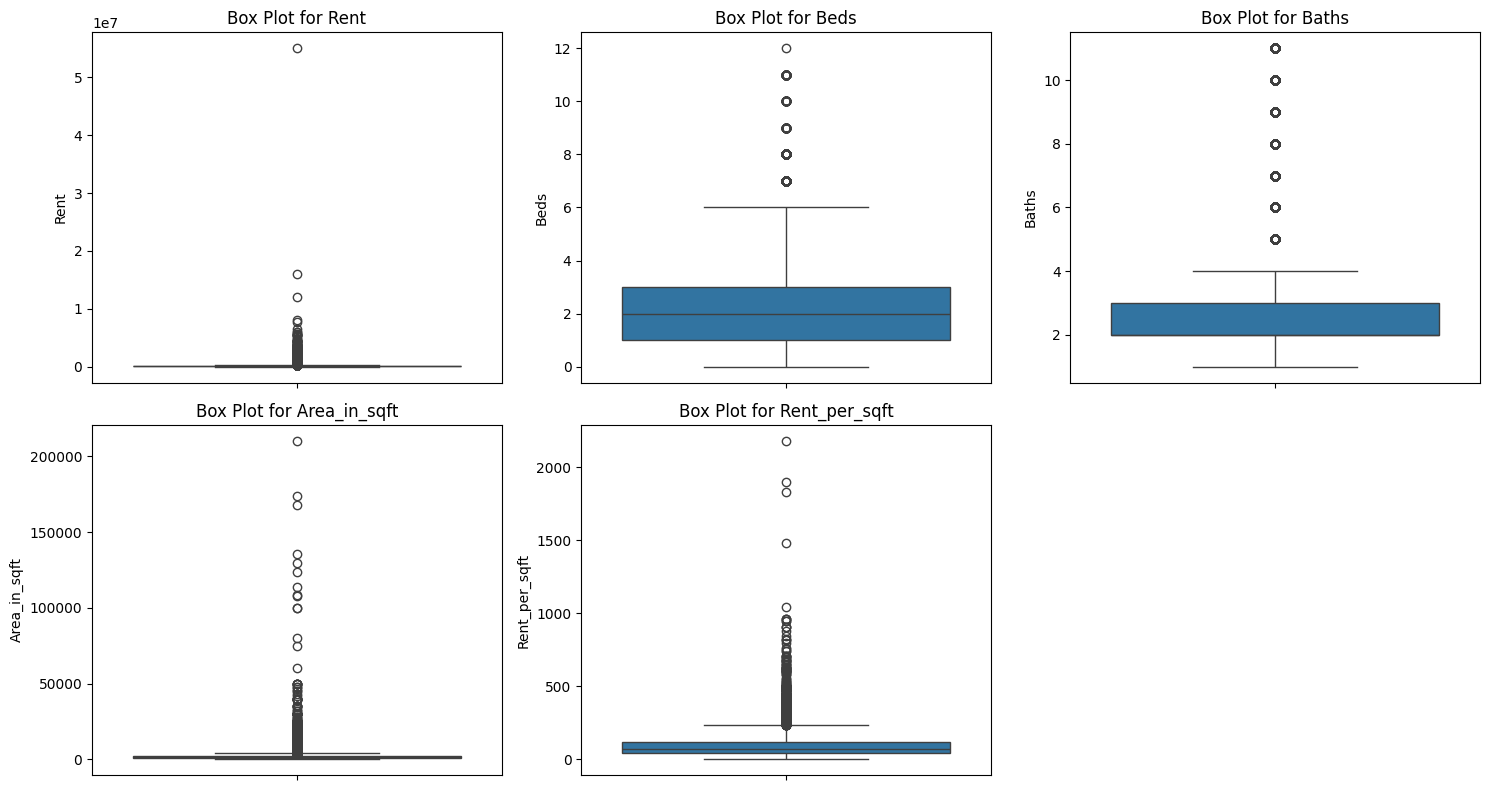

In [11]:
# Box plot for each numerical column
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

In [12]:
#  Detect and clean outliers using the IQR method
def clean_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [13]:
# Apply the cleaning function to all numerical columns
for col in numerical_columns:
    data = clean_outliers(data, col)

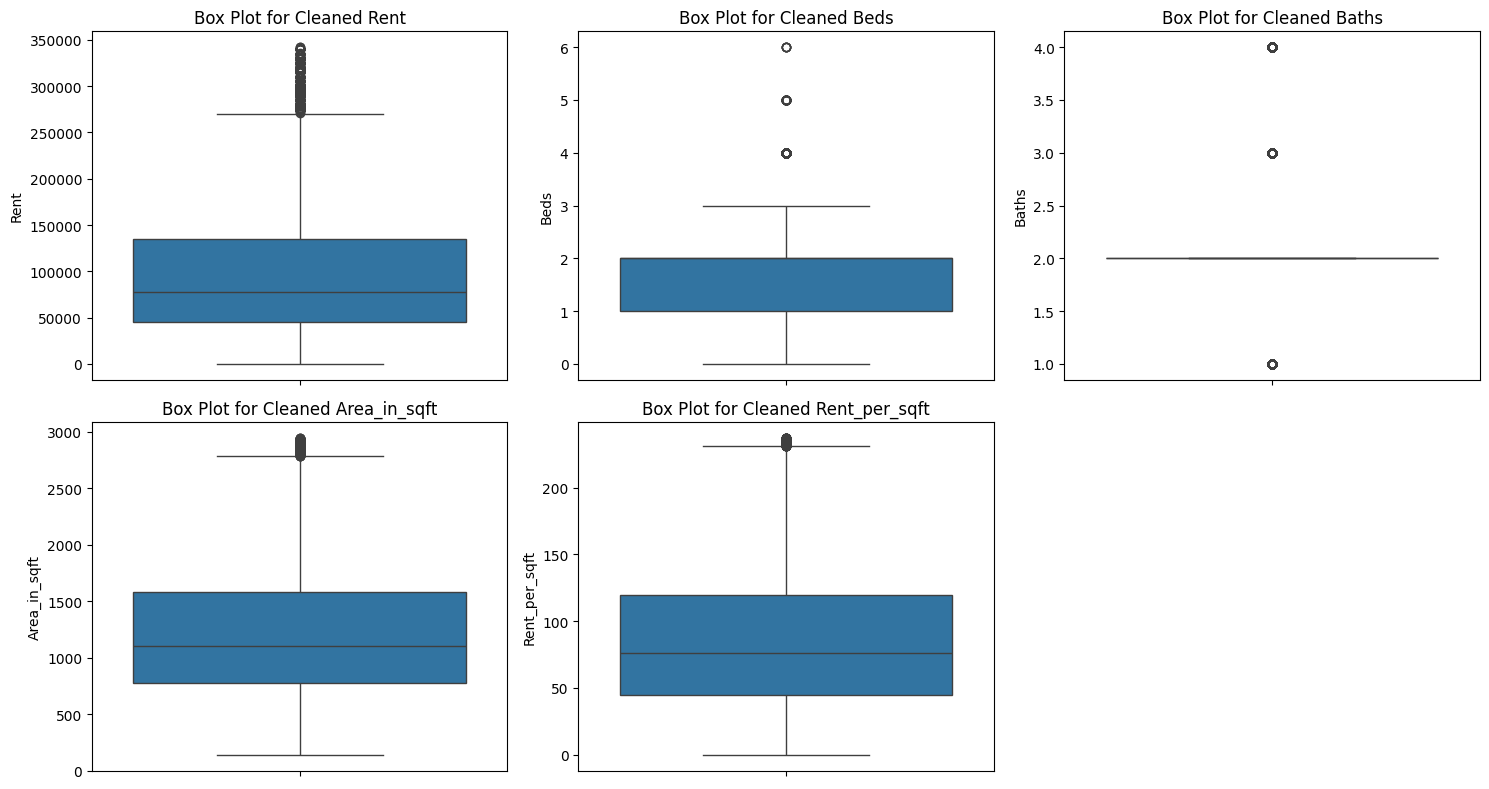

In [14]:
# Step 4: Visualize cleaned data with box plots
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Box Plot for Cleaned {column}')
plt.tight_layout()
plt.show()

# EDA

<ipython-input-15-dba0afb43783>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_area_rent, x='City', y=yaxes[count], palette=palettes[count], ax=i)
<ipython-input-15-dba0afb43783>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_area_rent, x='City', y=yaxes[count], palette=palettes[count], ax=i)


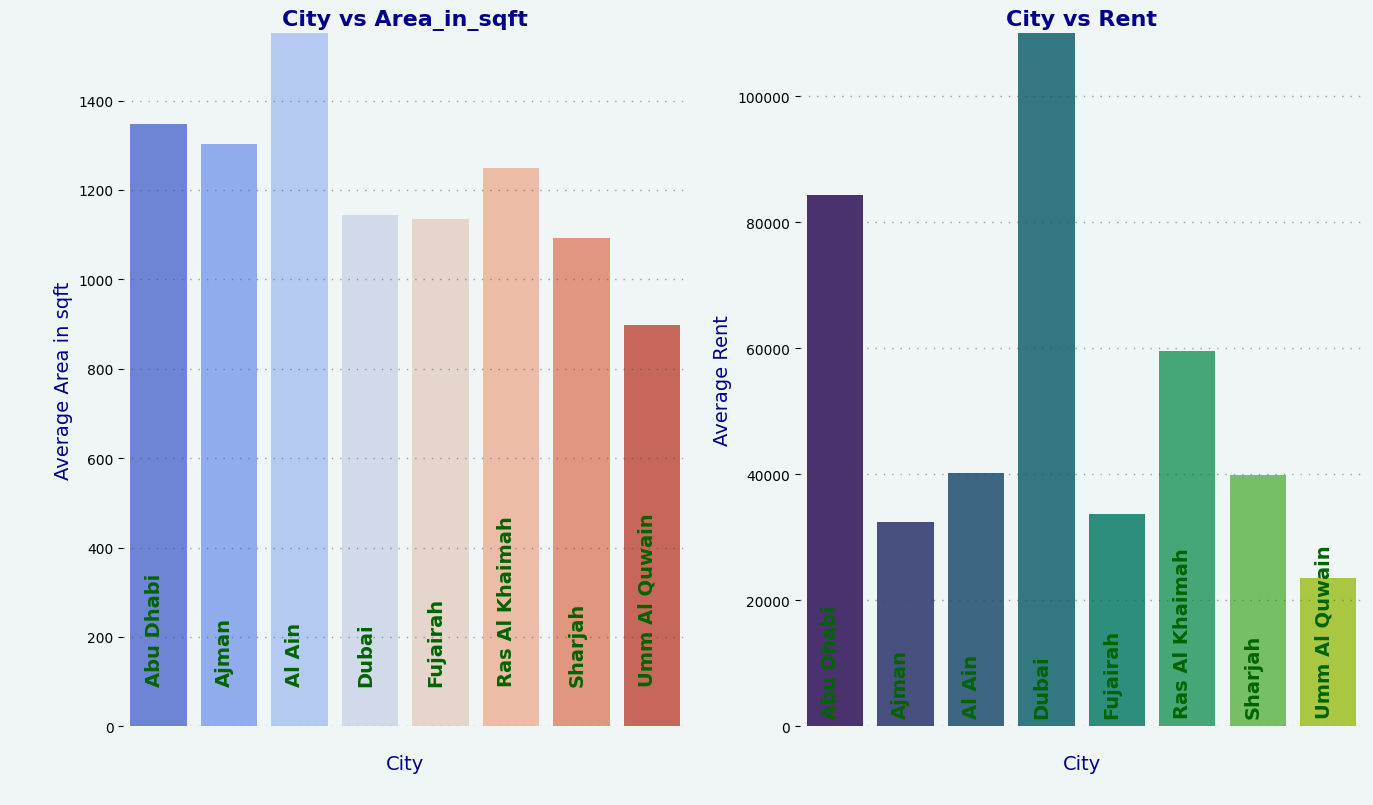

In [15]:
city_area_rent = data.groupby('City').agg({'Area_in_sqft': 'mean', 'Rent': 'mean'}).reset_index()

# Create figure and axes with new background color
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9), dpi=100)
fig.patch.set_facecolor('#f0f5f5')  # Light cyan background

# Define parameters
yaxes = ['Area_in_sqft', 'Rent']
palettes = ['coolwarm', 'viridis']  # Changed palettes
limit = [[0, 1550], [0, 110000]]
ylabel = ['Area in sqft', 'Rent']
text = [100, 2000]
count = 0

# Iterate over axes to customize each plot
for i in [ax1, ax2]:
    c_no = 0
    i.set_facecolor('#f0f5f5')  # Set background color for each plot

    # Create bar plots with new color palettes
    sns.barplot(data=city_area_rent, x='City', y=yaxes[count], palette=palettes[count], ax=i)

    # Customize the grid
    i.grid(axis='y', linewidth=1, alpha=0.5, color='#2f4f4f', linestyle=':', dashes=(1, 5))  # Dark gray grid

    # Set limits for y-axis
    i.set(ylim=limit[count])

    # Remove spines for a clean look
    for j in ['top', 'right', 'left', 'bottom']:
        i.spines[j].set_visible(False)

    # Set title and labels with updated colors
    i.set_title('City vs {}'.format(yaxes[count]), size=16, color='darkblue', fontweight='bold')
    i.set_xlabel('\nCity\n', size=14, color='darkblue')
    i.set_ylabel('\n\nAverage {}'.format(ylabel[count]), size=14, color='darkblue')

    # Remove x-ticks
    i.set_xticks([])

    # Add text annotations with new color
    for j in i.patches:
        i.text(j.get_x() + 0.2, text[count], city_area_rent['City'][c_no],
               rotation='vertical', weight='bold', color='darkgreen', fontsize=14)
        c_no += 1

    count += 1

plt.show()

<ipython-input-16-3d04ae62b388>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=room_type_rent, x='Type', y='Rent', palette='Blues_r', ax=ax)  # Changed to a reversed blue palette


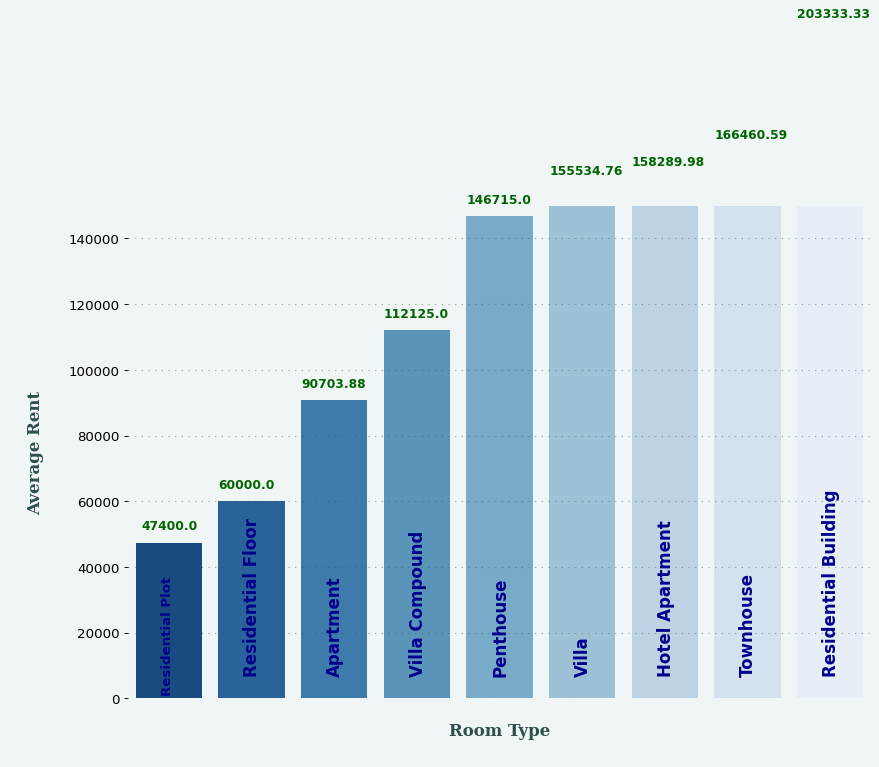

In [16]:
room_type_rent = data.groupby('Type')['Rent'].mean().sort_values(ascending=True).reset_index()

# Create figure and axis with updated background colors
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
fig.patch.set_facecolor('#f0f5f5')  # Light cyan background
ax.set_facecolor('#f0f5f5')  # Same background for the plot area

# Create the bar plot with updated color palette
sns.barplot(data=room_type_rent, x='Type', y='Rent', palette='Blues_r', ax=ax)  # Changed to a reversed blue palette

# Customize the grid lines
ax.grid(axis='y', linewidth=1, alpha=0.5, color='#2f4f4f', linestyle=':', dashes=(1, 5))  # Dark gray grid

# Customize labels
plt.xlabel('\nRoom Type\n', c='#2f4f4f', fontsize=15, fontweight='bold', fontfamily='serif')  # Dark gray text
plt.ylabel('\nAverage Rent\n', c='#2f4f4f', fontsize=15, fontweight='bold', fontfamily='serif')

# Set y-axis limit and ticks font size
ax.set(ylim=(0, 150000))
plt.xticks([], rotation=10, fontsize=12)  # Adjust x-ticks (hide if not needed)
plt.yticks(fontsize=12)

# Remove plot spines for a cleaner look
for i in ['left', 'top', 'right', 'bottom']:
    ax.spines[i].set_visible(False)

# Add text annotations for bar heights
count = 0
for i in ax.patches:
    # Add conditionally formatted annotations for bar labels and heights
    if i.get_height() < 40000:
        ax.text(i.get_x() + 0.3, 2000, room_type_rent['Type'][count], weight='bold', fontsize=11, color='darkblue', rotation='vertical')
        ax.text(i.get_x() + 0.07, i.get_height() + 4000, round(i.get_height(), 2), weight='bold', fontsize=11, color='darkgreen')
    elif 40000 < i.get_height() < 55000:
        ax.text(i.get_x() + 0.3, 2000, room_type_rent['Type'][count], weight='bold', fontsize=12, color='darkblue', rotation='vertical')
        ax.text(i.get_x() + 0.07, i.get_height() + 4000, round(i.get_height(), 2), weight='bold', fontsize=11, color='darkgreen')
    else:
        ax.text(i.get_x() + 0.3, 8000, room_type_rent['Type'][count], weight='bold', fontsize=15, color='darkblue', rotation='vertical')
        ax.text(i.get_x(), i.get_height() + 4000, round(i.get_height(), 2), weight='bold', fontsize=11, color='darkgreen')

    count += 1

plt.show()

In [17]:
# Import the plotly.express module and alias it as px
import plotly.express as px

# Group and count data by 'Furnishing' and 'Rent_category'
temp = data.groupby(['Furnishing', 'Rent_category'])['Rent_category'].count().to_frame().rename(columns={'Rent_category': 'count'}).reset_index()

# Create a sunburst chart with custom color mapping
fig = px.sunburst(temp,
                  path=['Furnishing', 'Rent_category'],
                  values='count',
                  color='Rent_category',
                  color_discrete_map={'(?)': '#ff00ff', 'Low': '#aa55ff', 'Medium': '#55aaff', 'High': '#00ffff'})

# Update layout: setting both plot and paper background colors to white
fig.update_layout(
    title={'text': 'Furnishing and Rent Categories', 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},  # Centered title
    font=dict(size=15, color='black'),  # Font styling
    margin=dict(l=0, r=80, t=55, b=10),  # Adjust margins
    plot_bgcolor='white',  # Set plot background to white
    paper_bgcolor='white'  # Set paper background to white
)

# Update traces to show both labels and values
fig.update_traces(textinfo="label+value")

# Show the figure
fig.show()

<ipython-input-18-19118e9ffc49>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




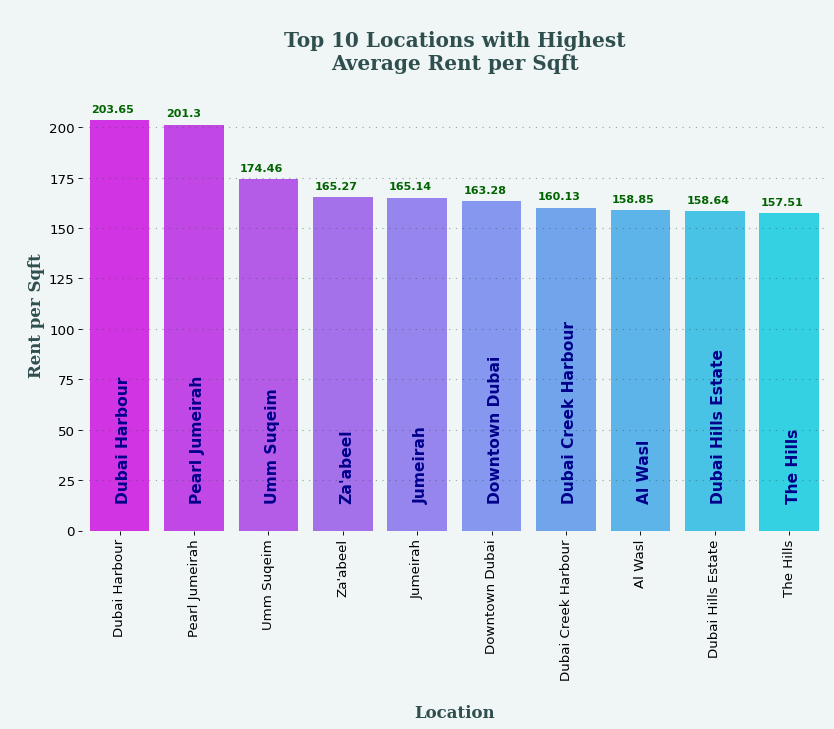

In [18]:
locations_rent = data.groupby('Location')['Rent_per_sqft'].mean().sort_values(ascending=False).head(10).reset_index()

# Create figure and axis with a specific background color
fig, ax = plt.subplots(figsize=(12, 7), dpi=80)
fig.patch.set_facecolor('#f0f5f5')  # Light cyan background
ax.set_facecolor('#f0f5f5')  # Same background for the plot area

# Create the bar plot using the 'cool_r' palette (reversed cool colors)
sns.barplot(data=locations_rent, x='Location', y='Rent_per_sqft', palette='cool_r', ax=ax)

# Customize the gridlines
ax.grid(axis='y', linewidth=1, alpha=0.5, color='#2f4f4f', linestyle=':', dashes=(1, 5))  # Dark gray grid

# Add title and labels with updated colors and font styles
plt.title('\nTop 10 Locations with Highest\nAverage Rent per Sqft\n', fontsize=18, c='#2f4f4f', fontweight='bold', fontfamily='serif')
plt.xlabel('\nLocation', c='#2f4f4f', fontsize=15, fontweight='bold', fontfamily='serif')
plt.ylabel('\nRent per Sqft', c='#2f4f4f', fontsize=15, fontweight='bold', fontfamily='serif')

# Adjust x-ticks for better readability
plt.xticks(rotation=90, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Remove plot spines for a cleaner look
for i in ['left', 'top', 'right', 'bottom']:
    ax.spines[i].set_visible(False)

# Annotate each bar with location name and rent per sqft value
count = 0
for i in ax.patches:
    # Location name annotation (adjusted for better placement)
    ax.text(i.get_x() + 0.35, 15, locations_rent['Location'][count], weight='bold', fontsize=14, color='darkblue', rotation='vertical')

    # Rent per sqft value annotation
    ax.text(i.get_x() + 0.02, i.get_height() + 4, round(i.get_height(), 2), weight='bold', fontsize=10, color='darkgreen')

    count += 1

plt.show()

# Label Encoding

In [19]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply One Hot Encoder to the specified columns
# Removed 'Purpose' from the list as it does not seem to exist
for column in ['Type', 'Furnishing', 'Location', 'City','Purpose','Frequency','Rent_category']:
    # Reshape the column data to a 2D array
    reshaped_data = data[column].values.reshape(-1, 1)

    # Use the reshaped data for encoding
    encoded_data = le.fit_transform(reshaped_data)

    # Assign the encoded data to the DataFrame column (no need for toarray())
    data[column] = encoded_data

# Display the encoded DataFrame
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessin

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,0,1785,69.467787,2,0,1,0,2024-03-07,45,109,0,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,0,1422,98.452883,2,0,1,0,2024-03-08,44,300,0,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,0,1314,75.342466,2,0,0,0,2024-03-21,31,98,0,24.485931,54.600939
5,"Reflection, Shams Abu Dhabi, Al Reem Island, A...",75000,1,1,0,706,106.232295,2,0,0,0,2023-12-12,131,109,0,24.493598,54.407841
6,"Water's Edge, Yas Island, Abu Dhabi",65000,1,1,0,698,93.123209,1,0,1,0,2024-03-11,41,300,0,24.494022,54.607372


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56776 entries, 0 to 73738
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 56776 non-null  object        
 1   Rent                    56776 non-null  int64         
 2   Beds                    56776 non-null  int64         
 3   Baths                   56776 non-null  int64         
 4   Type                    56776 non-null  int64         
 5   Area_in_sqft            56776 non-null  int64         
 6   Rent_per_sqft           56776 non-null  float64       
 7   Rent_category           56776 non-null  int64         
 8   Frequency               56776 non-null  int64         
 9   Furnishing              56776 non-null  int64         
 10  Purpose                 56776 non-null  int64         
 11  Posted_date             56776 non-null  datetime64[ns]
 12  Age_of_listing_in_days  56776 non-null  int64      

# Correlation

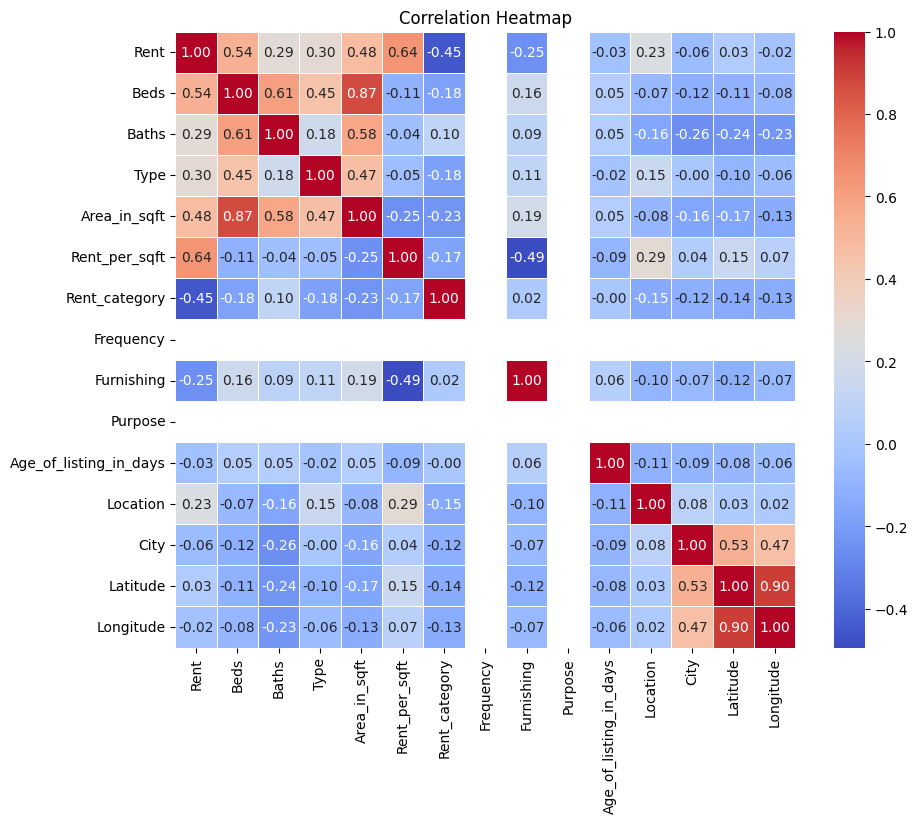

In [21]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
data=data.drop('Purpose', axis=1, errors='ignore')
data=data.drop('Frequency', axis=1, errors='ignore')
print(data.columns)

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Area_in_sqft',
       'Rent_per_sqft', 'Rent_category', 'Furnishing', 'Posted_date',
       'Age_of_listing_in_days', 'Location', 'City', 'Latitude', 'Longitude'],
      dtype='object')


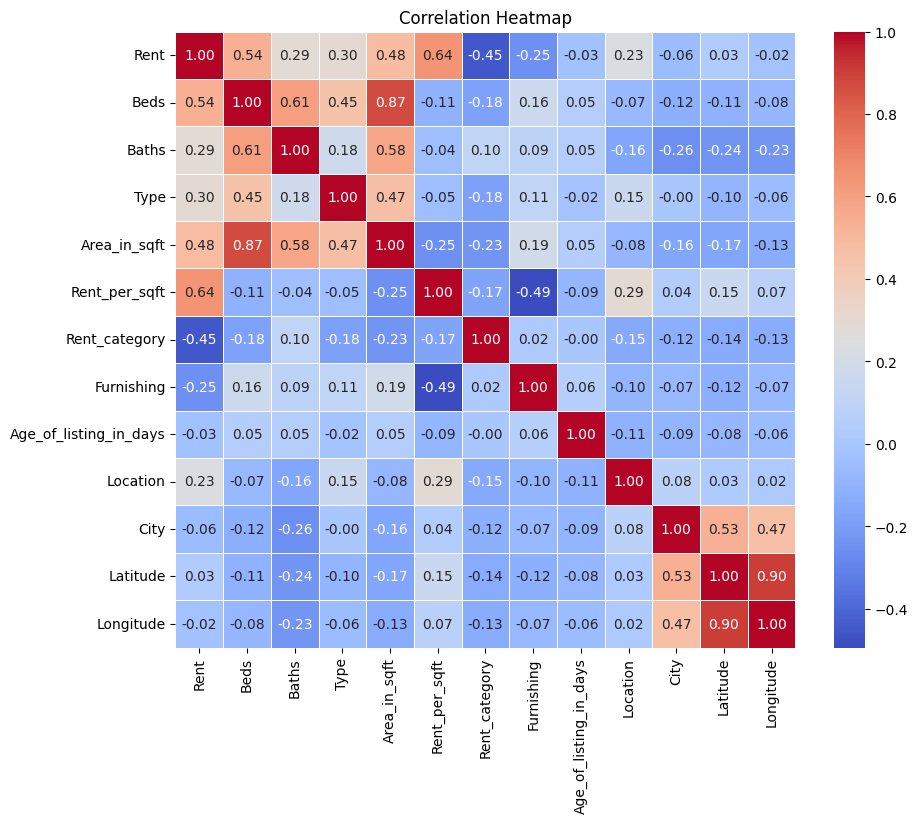

In [23]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature Selection

In [24]:
# Feature selection (drop columns that may not help in prediction)
X = data.drop(columns=['Rent', 'Address', 'Posted_date'])  # Features
y = data['Rent']  # Target

# XGBOST

In [25]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Initialize the XGBoost Regressor
xgbr = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [27]:
# Train the model
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [28]:
# Make predictions
y_pred = xgbr.predict(X_test)

# Evaluation

In [29]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 5687.703452384065
R-squared: 0.9877615988753828


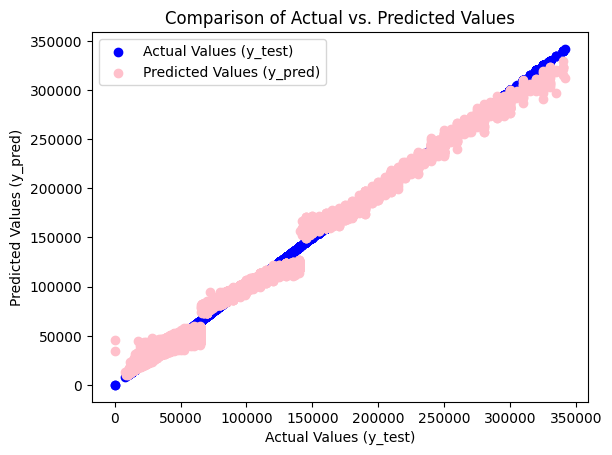

In [30]:
plt.scatter(y_test, y_test, color='blue', label='Actual Values (y_test)')
plt.scatter(y_test, y_pred, color='pink', label='Predicted Values (y_pred)')

# Add labels, legend, and a title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Comparison of Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()